# JSON exercises
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****
Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
*****

## Imports for Python, Pandas and Numpy

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [2]:
# json file with data 
json_file = 'data/world_bank_projects.json'

## Part 1 : Find the Top 10 countries with most projects

In [3]:
# load data from json file as Pandas dataframe
df = pd.read_json(json_file)
print "Total " + str(len(df)) + " records"
df.head(2)

Total 500 records


,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [4]:
# each project is represented as a record, so we group by countryshortname and count the rows in each group
# sort the records in descending order, so that the countries with most project are on top
g = df.groupby('countryshortname').size().sort_values(ascending=False).head(10)
print "Top 10 Countries with Most Projects"
g

Top 10 Countries with Most Projects


countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
dtype: int64

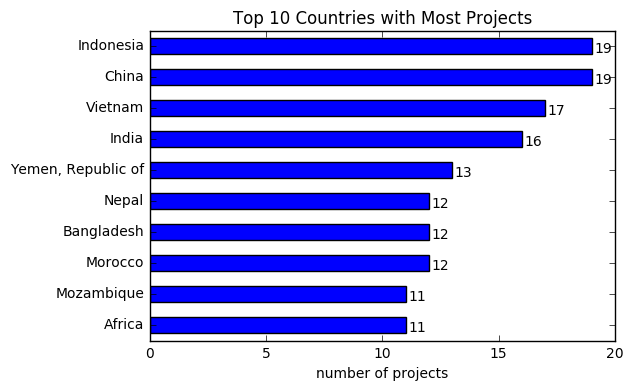

In [5]:
# plot a number of projects against top 10 countries
ax = g.plot(kind = 'barh', title = 'Top 10 Countries with Most Projects')

# invert y-axis so that the chart gois for largest to smallest and label the axes
ax.invert_yaxis() 
ax.set_ylabel('')
ax.set_xlabel('number of projects')

# annotate the chart to show a number of projects as a label next to the bar 
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()),
                xytext = (2,-10), textcoords='offset points')

## Part 2 and 3 : Find the  top 10 project major themes 

In [6]:
# load json data as a list 
data = json.load(open(json_file))
print "total records: " + str(len(data))
print " this is how mjtheme_name code field looks like"
data[0]['mjtheme_namecode']

total records: 500
 this is how mjtheme_name code field looks like


[{u'code': u'8', u'name': u'Human development'},
 {u'code': u'11', u'name': u''}]

In [7]:
# normalize data by the mjtheme_namecode field and use project id as metadata
d = json_normalize(data, 'mjtheme_namecode',[['_id','$oid']])

# rename the columns to have more clear names
d = d.rename(columns={'code':'theme_code', 'name':'theme_name', '_id.$oid':'project_id'})
d.head(10)

,theme_code,theme_name,project_id
0,8,Human development,52b213b38594d8a2be17c780
1,11,,52b213b38594d8a2be17c780
2,1,Economic management,52b213b38594d8a2be17c781
3,6,Social protection and risk management,52b213b38594d8a2be17c781
4,5,Trade and integration,52b213b38594d8a2be17c782
5,2,Public sector governance,52b213b38594d8a2be17c782
6,11,Environment and natural resources management,52b213b38594d8a2be17c782
7,6,Social protection and risk management,52b213b38594d8a2be17c782
8,7,Social dev/gender/inclusion,52b213b38594d8a2be17c783
9,7,Social dev/gender/inclusion,52b213b38594d8a2be17c783


In [8]:
# some theme names are empty. We sort by theme_code and then theme_name, so that empty names come on top 
d = d.sort_values(['theme_code','theme_name'])
d = d.reset_index()
d = d.drop('index', axis=1)
d.head(10)

,theme_code,theme_name,project_id
0,1,,52b213b38594d8a2be17c7ce
1,1,,52b213b38594d8a2be17c802
2,1,,52b213b38594d8a2be17c8da
3,1,,52b213b38594d8a2be17c8f7
4,1,,52b213b38594d8a2be17c95f
5,1,Economic management,52b213b38594d8a2be17c781
6,1,Economic management,52b213b38594d8a2be17c7a1
7,1,Economic management,52b213b38594d8a2be17c7c0
8,1,Economic management,52b213b38594d8a2be17c7cb
9,1,Economic management,52b213b38594d8a2be17c7cb


In [9]:
#empty theme_names are actually empty strings, we replace them with NaN so that we can fill those later
d['theme_name'] = d['theme_name'].replace('',np.nan)
d.head(10)

,theme_code,theme_name,project_id
0,1,NaN,52b213b38594d8a2be17c7ce
1,1,NaN,52b213b38594d8a2be17c802
2,1,NaN,52b213b38594d8a2be17c8da
3,1,NaN,52b213b38594d8a2be17c8f7
4,1,NaN,52b213b38594d8a2be17c95f
5,1,Economic management,52b213b38594d8a2be17c781
6,1,Economic management,52b213b38594d8a2be17c7a1
7,1,Economic management,52b213b38594d8a2be17c7c0
8,1,Economic management,52b213b38594d8a2be17c7cb
9,1,Economic management,52b213b38594d8a2be17c7cb


In [10]:
# now we can fill na using backward fill to propogate the name up 
d['theme_name'] = d['theme_name'].fillna(method='bfill')
d.head(10)

,theme_code,theme_name,project_id
0,1,Economic management,52b213b38594d8a2be17c7ce
1,1,Economic management,52b213b38594d8a2be17c802
2,1,Economic management,52b213b38594d8a2be17c8da
3,1,Economic management,52b213b38594d8a2be17c8f7
4,1,Economic management,52b213b38594d8a2be17c95f
5,1,Economic management,52b213b38594d8a2be17c781
6,1,Economic management,52b213b38594d8a2be17c7a1
7,1,Economic management,52b213b38594d8a2be17c7c0
8,1,Economic management,52b213b38594d8a2be17c7cb
9,1,Economic management,52b213b38594d8a2be17c7cb


In [11]:
# group by theme code and name to count projects in each theme and output top 10 themes with code and names 
themes = d.groupby(['theme_code','theme_name']).size().sort_values(ascending=False).head(10)
print "Top 10 major themes with most projects"
themes

Top 10 major themes with most projects


theme_code  theme_name                                  
11          Environment and natural resources management    250
10          Rural development                               216
8           Human development                               210
2           Public sector governance                        199
6           Social protection and risk management           168
4           Financial and private sector development        146
7           Social dev/gender/inclusion                     130
5           Trade and integration                            77
9           Urban development                                50
1           Economic management                              38
dtype: int64

In [12]:
themes = themes.reset_index()
themes = themes.rename(columns ={0:'number_of_projects'})
themes

,theme_code,theme_name,number_of_projects
0,11,Environment and natural resources management,250
1,10,Rural development,216
2,8,Human development,210
3,2,Public sector governance,199
4,6,Social protection and risk management,168
5,4,Financial and private sector development,146
6,7,Social dev/gender/inclusion,130
7,5,Trade and integration,77
8,9,Urban development,50
9,1,Economic management,38


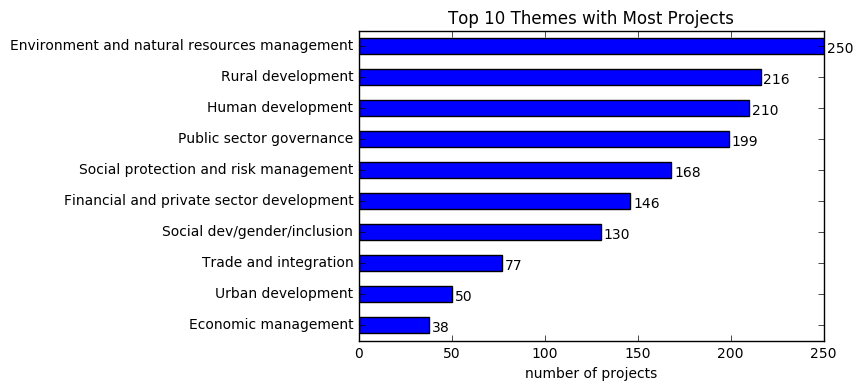

In [13]:
# plot a number of projects against top 10 themes
ax = themes.plot(x = 'theme_name', y = 'number_of_projects', kind = 'barh', 
                 title = 'Top 10 Themes with Most Projects', legend = False)

# invert y-axis so that the chart goes from largest to smallest and label the axes
ax.invert_yaxis() 
ax.set_ylabel('')
ax.set_xlabel('number of projects')


# annotate the chart to show a number of projects as a label next to the bar 
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()),
                xytext = (2,-10), textcoords='offset points')